# partie 1 / préparation des données

In [5]:
class_replacement_dict = {
    'Zanclidae (Moorish Idol)': 'Moorish Idol',
    'Zanclidae -Moorish Idol-': 'Moorish Idol',
    'Scaridae -Parrotfishes-': 'Parrotfish',
    'Carangidae -Jacks-': 'Jack',
    'Scombridae -Tunas-': 'Tuna',
    'Shark -Selachimorpha-': 'Shark',
    'Serranidae -Groupers-': 'Grouper',
    'Lutjanidae -Snappers-': 'Snapper',
    'Acanthuridae -Surgeonfishes-': 'Surgeonfish',
    'Pomacentridae -Damselfishes-': 'Damselfish',
    'Labridae -Wrasse-': 'Wrasse',
    'Pomacanthidae -Angelfishes-': 'Angelfish',
    'Balistidae -Triggerfishes-': 'Triggerfish',
    'Ephippidae -Spadefishes-': 'Spadefish',
    'tuna': 'Tuna',
    'surgeon': 'Surgeonfish',
    'shark': 'Shark',
    'jack': 'Jack',
    'grouper': 'Grouper',
    'parrot': 'Parrotfish',
    'snapper': 'Snapper',
    'damsel': 'Damselfish',
    'trigger': 'Triggerfish',
    'angel': 'Angelfish',
    'wrasse': 'Wrasse',
    'spade': 'Spadefish'
}


In [6]:
import os
import pandas as pd
from PIL import Image

def update_class_names(csv_path, replacement_dict):
    df = pd.read_csv(csv_path)
    # Normalise et remplace les noms de classe
    df['class'] = df['class'].apply(lambda x: x.replace('(', '').replace(')', '').replace('-', '').replace("'", "").strip())
    df['class'] = df['class'].replace(replacement_dict)
    return df

# Chemins vers les fichiers CSV
csv_paths = [
    'Fish.v1-416x416.tensorflow/train/_annotations.csv',
    'Fish.v1-416x416.tensorflow/test/_annotations.csv',
    'Fish.v1-416x416.tensorflow/valid/_annotations.csv'
]

# Appliquer le dictionnaire de remplacement à chaque DataFrame
for csv_path in csv_paths:
    df = update_class_names(csv_path, class_replacement_dict)
    # Afficher les classes uniques après la mise à jour pour vérification
    print(f"Classes uniques après mise à jour dans {csv_path}: {df['class'].unique()}")
    # Optionnel : Sauvegarder le DataFrame modifié si nécessaire
    df.to_csv(csv_path, index=False)


# Créer le dossier cropped_images s'il n'existe pas
cropped_images_dir = 'cropped_images'
os.makedirs(cropped_images_dir, exist_ok=True)

# Fonction pour découper et sauvegarder l'image
def crop_and_save_image(row, src_dir, dst_dir):
    # Chemins des fichiers
    src_path = os.path.join(src_dir, row['filename'])
    dst_class_path = os.path.join(dst_dir, row['class'])
    
    # Création du dossier de la classe s'il n'existe pas
    os.makedirs(dst_class_path, exist_ok=True)
    
    # Découpe de l'image
    try:
        with Image.open(src_path) as img:
            # Vérifier si la taille de l'image est supérieure à 0
            if img.size[0] > 0 and img.size[1] > 0:
                cropped_img = img.crop((row['xmin'], row['ymin'], row['xmax'], row['ymax']))
                dst_file_path = os.path.join(dst_class_path, row['filename'])
                # Vérifier si le fichier existe déjà pour éviter les doublons
                if not os.path.exists(dst_file_path):
                    cropped_img.save(dst_file_path)
    except Exception as e:
        print(f"Erreur avec l'image {row['filename']}: {e}")

# Fonction pour traiter les images d'un ensemble donné
def process_images_set(csv_path, images_src_dir, dst_dir):
    # Lire les données du fichier CSV
    df = pd.read_csv(csv_path)
    
    # Suppression des doublons basée sur les noms de fichiers et les coordonnées
    df = df.drop_duplicates(subset=['filename', 'xmin', 'ymin', 'xmax', 'ymax'])
    
    # Appliquer la fonction à chaque ligne du DataFrame
    df.apply(lambda row: crop_and_save_image(row, images_src_dir, dst_dir), axis=1)

# Traitement pour chaque ensemble
sets = ['train', 'test', 'valid']
for set_name in sets:
    csv_path = f'Fish.v1-416x416.tensorflow/{set_name}/_annotations.csv'
    images_src_dir = f'Fish.v1-416x416.tensorflow/{set_name}'
    dst_dir = os.path.join(cropped_images_dir, set_name)
    
    # Créer le dossier pour l'ensemble s'il n'existe pas
    os.makedirs(dst_dir, exist_ok=True)
    
    # Traitement des images de l'ensemble
    process_images_set(csv_path, images_src_dir, dst_dir)


Classes uniques après mise à jour dans Fish.v1-416x416.tensorflow/train/_annotations.csv: ['Tuna' 'Surgeonfish' 'Shark' 'Jack' 'Grouper' 'Parrotfish' 'Snapper'
 'Damselfish' 'Triggerfish' 'Zanclidae Moorish Idol'
 'Scaridae Parrotfishes' 'Carangidae Jacks' 'Scombridae Tunas'
 'Shark Selachimorpha' 'Serranidae Groupers' 'Lutjanidae Snappers'
 'Acanthuridae Surgeonfishes' 'Pomacentridae Damselfishes'
 'Labridae Wrasse' 'Angelfish' 'Wrasse' 'Ephippidae Spadefishes'
 'Pomacanthidae Angelfishes' 'Balistidae Triggerfishes' 'Spadefish']
Classes uniques après mise à jour dans Fish.v1-416x416.tensorflow/test/_annotations.csv: ['Lutjanidae Snappers' 'Carangidae Jacks' 'Acanthuridae Surgeonfishes'
 'Scaridae Parrotfishes' 'Scombridae Tunas' 'Grouper'
 'Shark Selachimorpha' 'Serranidae Groupers' 'Jack' 'Snapper' 'Tuna'
 'Shark' 'Parrotfish' 'Surgeonfish']
Classes uniques après mise à jour dans Fish.v1-416x416.tensorflow/valid/_annotations.csv: ['Acanthuridae Surgeonfishes' 'Carangidae Jacks' 'Scar

In [7]:
import os
import shutil

# Définir les chemins vers les dossiers source
source_folders = {
    'train': 'cropped_images/train',
    'test': 'cropped_images/test',
    'valid': 'cropped_images/valid'
}

# Définir le chemin vers le dossier cible
target_folder = 'all_classes'

# Créer le dossier cible s'il n'existe pas
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Fonction pour copier les images de chaque classe dans le dossier correspondant
def copy_images_to_class_folder(source_path, target_path):
    # Parcourir tous les dossiers de classe dans le dossier source
    for class_name in os.listdir(source_path):
        class_source_path = os.path.join(source_path, class_name)
        class_target_path = os.path.join(target_path, class_name)
        
        # Créer le dossier de classe dans le dossier cible s'il n'existe pas
        if not os.path.exists(class_target_path):
            os.makedirs(class_target_path)
        
        # Copier chaque image du dossier de classe source vers le dossier de classe cible
        for image_name in os.listdir(class_source_path):
            source_image_path = os.path.join(class_source_path, image_name)
            target_image_path = os.path.join(class_target_path, image_name)
            
            # Éviter de copier si l'image existe déjà dans le dossier cible
            if not os.path.exists(target_image_path):
                shutil.copy2(source_image_path, target_image_path)

# Appliquer la fonction de copie pour chaque ensemble de données
for dataset_type, path in source_folders.items():
    copy_images_to_class_folder(path, target_folder)

print("Les images ont été copiées dans les dossiers de classe correspondants.")

Les images ont été copiées dans les dossiers de classe correspondants.


In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Chemin du dossier contenant toutes les classes
all_classes_dir = 'all_classes'

# Chemins des dossiers pour les ensembles d'entraînement, de validation, et de test
train_dir = 'dataset/train'
val_dir = 'dataset/val'
test_dir = 'dataset/test'

# Pourcentages pour le split (ex: 70% train, 15% validation, 15% test)
train_size = 0.7
val_size = 0.15
# Le pourcentage de test est calculé par différence

# Assurez-vous que les dossiers existent ou créez-les
for path in [train_dir, val_dir, test_dir]:
    if not os.path.exists(path):
        os.makedirs(path)


In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Définition de la fonction copy_images en dehors de la boucle
def copy_images(images, dest_dir):
    class_dest_dir = os.path.join(dest_dir, class_name)
    if not os.path.exists(class_dest_dir):
        os.makedirs(class_dest_dir)
    for img in images:
        shutil.copy(img, class_dest_dir)

# Parcourir chaque classe dans le dossier all_classes_dir
for class_name in os.listdir(all_classes_dir):
    # Chemin du dossier de la classe actuelle
    class_dir = os.path.join(all_classes_dir, class_name)
    
    # Obtenir une liste de toutes les images dans le dossier de la classe
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
    
    # Vérifier si la classe contient une seule image
    if len(images) == 1:
        # Copier l'image unique dans tous les ensembles
        copy_images(images, train_dir)
        copy_images(images, val_dir)
        copy_images(images, test_dir)
        continue  # Passer à la classe suivante

    # Splitter les images en ensembles d'entraînement, de validation, et de test
    train_val_images, test_images = train_test_split(images, test_size=1-train_size-val_size, random_state=42)
    
    # Vérifier si le nombre d'images restantes est suffisant pour un second split
    if len(train_val_images) > 1:
        train_images, val_images = train_test_split(train_val_images, test_size=val_size/(train_size+val_size), random_state=42)
    else:
        # Pas assez d'images pour diviser, attribuer toutes les images restantes à l'ensemble d'entraînement
        train_images = train_val_images
        val_images = []
    
    # Copier les images dans les dossiers d'entraînement, de validation et de test
    copy_images(train_images, train_dir)
    copy_images(val_images, val_dir)
    copy_images(test_images, test_dir)


Found 963 images belonging to 25 classes.


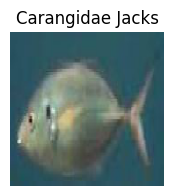

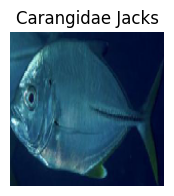

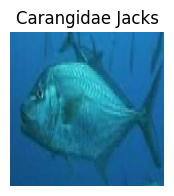

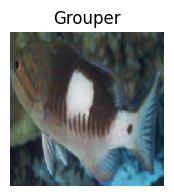

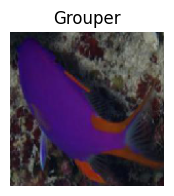

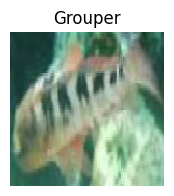

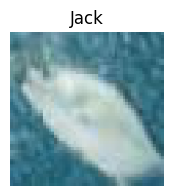

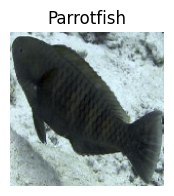

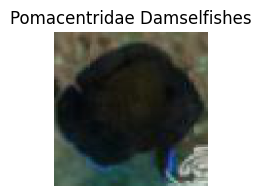

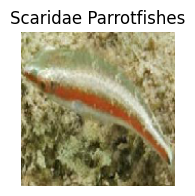

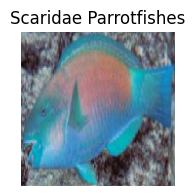

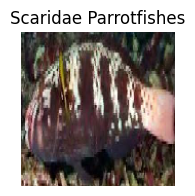

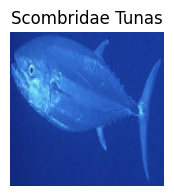

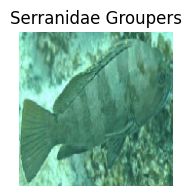

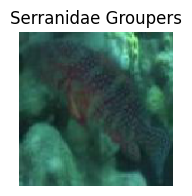

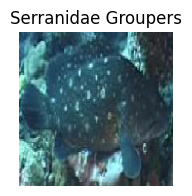

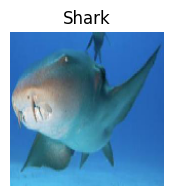

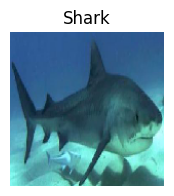

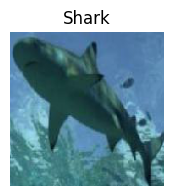

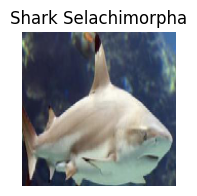

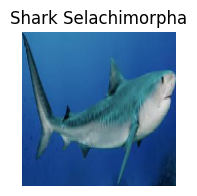

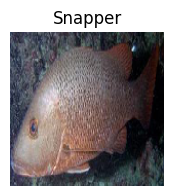

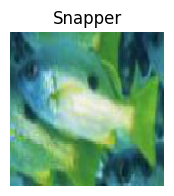

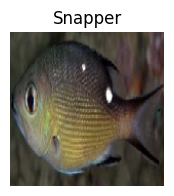

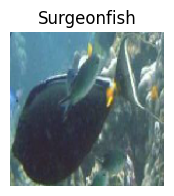

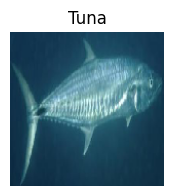

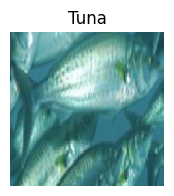

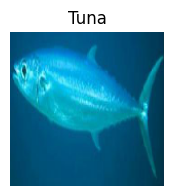

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'dataset/train'  # Assurez-vous de remplacer par le chemin réel

# Création du générateur de données d'entraînement
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    shuffle=True)

# Nombre d'images à afficher pour chaque catégorie
images_per_class = 3

# Extraction et affichage des images
for cls in train_generator.class_indices:
    cls_index = train_generator.class_indices[cls]  # Index de la classe courante
    imgs, labels = next(train_generator)  # Charger un batch d'images et de labels
    displayed = 0
    for img, label in zip(imgs, labels):
        if label[cls_index] == 1 and displayed < images_per_class:  # Vérifie si l'image appartient à la classe courante
            plt.figure(figsize=(2, 2))
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
            plt.show()
            displayed += 1
        if displayed >= images_per_class:
            break


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Création du modèle
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.7),  # Augmentation du taux de dropout à 0.6
    Dense(25, activation='softmax')  # Ajustez ce nombre selon le nombre de classes
])

# 2. Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3. Entraînement du modèle
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

train_dir = 'dataset/train'
validation_dir = 'dataset/val'

# Création des générateurs de données sans augmentation pour simplifier
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

nombre_images_entrainement = 963  # Ajustez selon votre dataset
nombre_images_validation = 216    # Ajustez selon votre dataset

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

history = model.fit(
    train_generator,
    steps_per_epoch=nombre_images_entrainement // 20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=nombre_images_validation // 20,
    callbacks=[early_stopping])

# Graphiques d'évolution de l'accuracy et de la perte
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(14, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Évaluation du modèle
test_dir = 'dataset/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

eval_result = model.evaluate(test_generator)
print(f'Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}')



Found 963 images belonging to 25 classes.
Found 216 images belonging to 25 classes.
Epoch 1/20
48/48 [==============================] - 20s 396ms/step - loss: 2.8930 - accuracy: 0.1029 - val_loss: 2.6564 - val_accuracy: 0.1500
Epoch 2/20
48/48 [==============================] - 16s 323ms/step - loss: 2.7031 - accuracy: 0.1145 - val_loss: 2.7711 - val_accuracy: 0.1150
Epoch 3/20
48/48 [==============================] - 17s 347ms/step - loss: 2.5623 - accuracy: 0.1474 - val_loss: 2.6082 - val_accuracy: 0.1450
Epoch 4/20
48/48 [==============================] - 16s 332ms/step - loss: 2.5116 - accuracy: 0.1368 - val_loss: 2.6398 - val_accuracy: 0.1250
Epoch 5/20
40/48 [========================>.....] - ETA: 2s - loss: 2.4873 - accuracy: 0.1775


Les graphiques montrent une divergence entre la précision d'entraînement et la précision de validation ainsi qu'une augmentation de la perte de validation au fil des époques, ce qui est un signe classique de surapprentissage. Le modèle apprend bien les données d'entraînement mais ne parvient pas à généraliser aux données de validation, indiquant qu'il ne performe pas aussi bien sur des données non vues lors de l'entraînement. En outre, la faible précision de validation suggère que le modèle a des difficultés à classifier correctement les espèces de poissons, ce qui est le but principal de cet exercice de classification. La performance globale du modèle est donc médiocre

même le fait de changer le dropout peut améliorer un peu le train mais pas le test. donc on peut supposer qu'il manque des données

# partie 2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Chemins des données
train_dir = 'dataset/train'
validation_dir = 'dataset/val'
test_dir = 'dataset/test'

# Paramètres de prétraitement
img_size = (150, 150)
batch_size = 32

# Augmentation de données pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Pas d'augmentation de données pour les ensembles de validation et de test (juste rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Chargement du modèle VGG16 pré-entraîné sans les couches supérieures
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Gel des couches du modèle VGG16
for layer in base_model.layers:
    layer.trainable = False

# Ajout de nouvelles couches
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(25, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle avec fine-tuning
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# Fine-tuning: dégel des dernières couches du modèle VGG16
for layer in model.layers[:15]:
    layer.trainable = False
for layer in model.layers[15:]:
    layer.trainable = True

# Recompilation du modèle pour le fine-tuning
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle (fine-tuning)
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Évaluation finale du modèle sur l'ensemble de test
final_test_loss, final_test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Final Test accuracy: {final_test_acc}, Final Test loss: {final_test_loss}')


on essaie d'autes modèles

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Chemins des données
train_dir = 'dataset/train'
validation_dir = 'dataset/val'
test_dir = 'dataset/test'

# Paramètres de prétraitement
img_size = (150, 150)
batch_size = 32

# Augmentation de données pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Pas d'augmentation de données pour les ensembles de validation et de test (juste rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

def train_and_evaluate_model(base_model, num_epochs=5, fine_tune_epochs=5):
    # Gel des couches du modèle
    for layer in base_model.layers:
        layer.trainable = False

    # Ajout de nouvelles couches
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(25, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Compilation du modèle
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Entraînement du modèle
    model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=num_epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size
    )

    # Fine-tuning: dégel des dernières couches du modèle
    for layer in model.layers[:15]:
        layer.trainable = False
    for layer in model.layers[15:]:
        layer.trainable = True

    # Recompilation du modèle pour le fine-tuning
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Entraînement du modèle (fine-tuning)
    model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=fine_tune_epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size
    )

    # Évaluation du modèle sur l'ensemble de test
    test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
    print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# Liste des modèles à tester
models_to_test = [ResNet50, InceptionV3, MobileNetV2]

for model_func in models_to_test:
    print(f"Training and evaluating {model_func.__name__}")
    base_model = model_func(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    train_and_evaluate_model(base_model)


on a la meilleure accuracy pour le MobileNetV2, en tout cas en ne mettant que 5 epoques, manque de temps pour mettre plus pour le moment
en tout cas on observe une nette amélioration par rapport au model qu'on a fait à la main avant.

# partie 3

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Création du modèle
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout pour réduire le surapprentissage
    Dense(25, activation='softmax')  # Remplacer 25 par le nombre de classes
])

# 2. Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Utiliser 'sparse_categorical_crossentropy' si les étiquettes sont encodées en entiers
              metrics=['accuracy'])

# 3. Entraînement du modèle
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Remplacer avec vos chemins de dossiers
train_dir = 'dataset/train'
validation_dir = 'dataset/val'

# Créer des générateurs de données


# Création du générateur avec augmentation de données pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,      # Rotation aléatoire de l'image dans la plage (0-45 degrés)
    width_shift_range=0.25, # Translation horizontale (jusqu'à 25% de la largeur totale)
    height_shift_range=0.25,# Translation verticale (jusqu'à 25% de la hauteur totale)
    shear_range=0.25,       # Cisaillement de l'image
    zoom_range=0.25,        # Zoom dans l'image
    channel_shift_range=50, # Changements aléatoires de la luminosité
    horizontal_flip=True,   # Retournement horizontal
    vertical_flip=True,     # Retournement vertical (pour des cas où l'orientation de l'image n'a pas d'importance)
    fill_mode='reflect'     # Utiliser 'reflect' pour une méthode de remplissage différente
)

validation_datagen = ImageDataGenerator(rescale=1./255)

nombre_images_entrainement = 963 
nombre_images_validation = 216

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

history = model.fit(
    train_generator,
    steps_per_epoch=nombre_images_entrainement // 20,  # Utilisez une division entière
    epochs=20,
    validation_data=validation_generator,
    validation_steps=nombre_images_validation // 20,  # Utilisez une division entière
    callbacks=[early_stopping])

# Création des graphiques pour représenter l'évolution des valeurs d'accuracy et de perte
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(14, 5))

# Tracer la précision
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Tracer la perte
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Évaluation du modèle
test_dir = 'dataset/test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Assurez-vous que 'test_dir' est le chemin vers votre dossier de test
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'  # Utilisez 'categorical' pour les étiquettes catégorielles
)

eval_result = model.evaluate(test_generator)
print(f'Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}')



le résultat est similaire au précédent en terme d'accuracy si ce n'est pire, mais au moins on n'a pas d'overfitting, les courbes de training et de validation se suivent dans les deux cas

In [ ]:
'''TEST POUR VOIR SI ENLEVER LES CATEGORIES NON REPRESENTATIVES AIDE (NON)

import os
import shutil

def remove_small_categories(directory):
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    for category in categories:
        category_path = os.path.join(directory, category)
        # Compter le nombre d'images dans la catégorie
        num_images = len([name for name in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, name))])
        # Si moins de 5 images, supprimer le dossier de la catégorie
        if num_images < 5:
            shutil.rmtree(category_path)
            print(f"Supprimé: {category_path} - contient seulement {num_images} images")

# Chemins vers les dossiers d'entraînement, de test, et de validation
directories = ['dataset/train', 'dataset/test', 'dataset/val']

for directory in directories:
    remove_small_categories(directory)
'''